# Practical work 1 : MLP

## Import libraries

In [114]:
import numpy as np
import matplotlib.pyplot as plt

## Tools

In [115]:
# Generates random data (3 classes)
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

# Converts a class vector (integers) to binary class matrix (copy from keras)
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

## Training data generation 

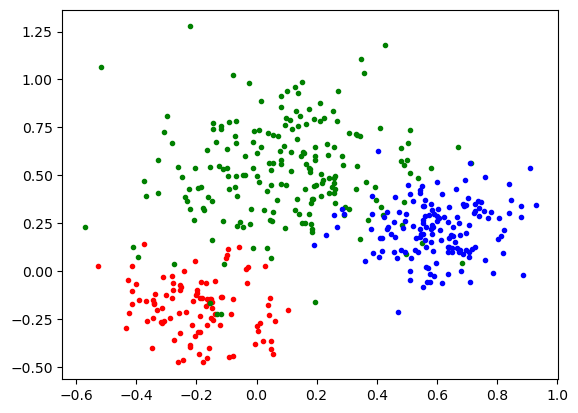

K=3, num_example=450, dimension=2


In [116]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_cat = to_categorical(Y_train)

K = Y_cat.shape[1] #nombre de classes
( num_examples, D ) = X_train.shape # nombre d'exemples et dimension des exemples
print( f"K={K}, num_example={num_examples}, dimension={D}")

## One layer perceptron

In [117]:
# sigmoid function
def sigmo(v):
	return 1/(1+np.exp(-v))

# sigmoid function derivative
def sigmop(v):
	return np.exp(-v)/(1+np.exp(-v))**2

### Training stage

In [130]:
# weights random initialization
W = 1 * np.random.normal( size=( D, K ) )
b = np.zeros( ( 1, K ) )

# learning parameters
step_size = 1e-1
iter_number = 10000

In [131]:
Y_1 = np.zeros_like(np.matmul(X_train,W))
for i in range(len(Y_train)):
    Y_1[i,int(Y_train[i])] = 1
    
Y_1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [132]:
# Network learning
X = X_train
Y = Y_train
losses = np.zeros( iter_number )

for i in range( iter_number ):
    # forward (propagation)
    v = np.matmul(X_train,W) + b
    Y_pred = sigmo(v)
    Err = Y_pred - Y_1
    losses[i] = sum(sum(Err**2))
    
    if i % 1000 == 0:   
        print(f"iteration {i}: loss {losses[i]}")

    # backward (back-propagation)

    

    dL_W =  2 * np.matmul(X.T,np.multiply(Err,sigmop(v)))
    dL_b =  2 * np.matmul(np.ones([450,1]).T,np.multiply(Err,sigmop(v)))

    W += -dL_W * step_size
    b += -dL_b * step_size

iteration 0: loss 290.12951448247026
iteration 1000: loss 54.2543952162829
iteration 2000: loss 54.241913148177915
iteration 3000: loss 54.24141607750472
iteration 4000: loss 54.241390989735464
iteration 5000: loss 54.24138963101263
iteration 6000: loss 54.241389554599095
iteration 7000: loss 54.24138955017679
iteration 8000: loss 54.24138954991457
iteration 9000: loss 54.24138954989871


### Loss and accuracy

In [133]:
def pr_class(Y_pred) :
    Y = np.zeros(len(Y_pred))
    for i in range(len(Y_pred)) :
        Y[i] =  np.argmax(Y_pred[i,:])
    return Y

training accuracy: 0.94


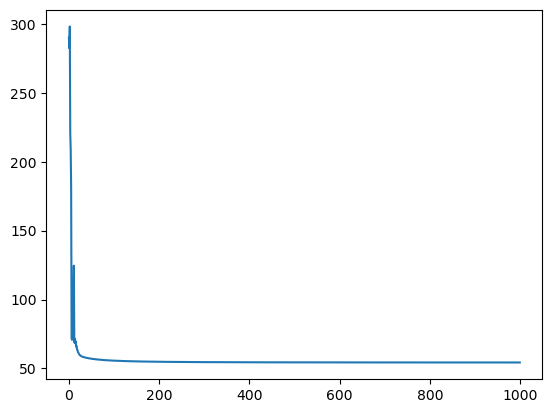

In [138]:
# Loss ploting
plt.clf
plt.plot(losses[0:1000])

# training accuracy
v = np.matmul(X_train,W) + b
Y_pred = sigmo(v)
class_pred = pr_class(Y_pred)
print( f"training accuracy: {np.mean(class_pred == Y_train):.2f}" )

## Pour aller plus loin
* code d'évaluation des performances (et de visualisation)
* création d'un jeu de test indépendant (performance en généralisation)
* ajouter une couche cachée (obeserver les gain en performance et les frontière de décision)

### Testing

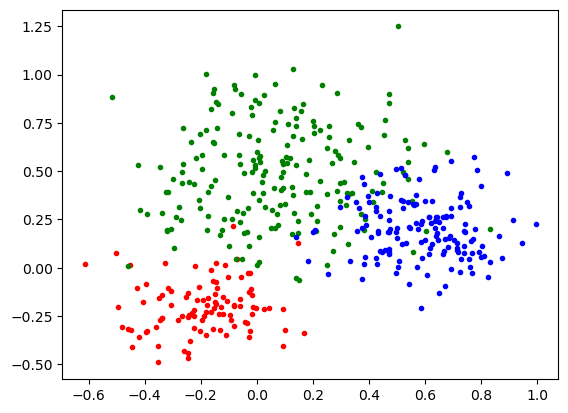

In [123]:
X_test, Y_test = generate_data_3classes(100, 200, 150)
Y_test_cat = to_categorical(Y_train)

In [124]:
def predict(X,W,b):
    v = np.matmul(X_train,W) + b
    return sigmo(v)

def evaluate(Y_pred, Y):
    class_pred = pr_class(Y_pred)
    print( f"Accuracy: {np.mean(class_pred == Y):.2}" )

In [125]:
Y_train_pred = predict(X_train,W,b)
Y_test_pred = predict(X_test,W,b)
score_train = evaluate(Y_train_pred, Y_train)
score_test = evaluate(Y_test_pred, Y_test)

Accuracy: 0.94
Accuracy: 0.94
